In [1]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


## Setting up the simulator:

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2019-05-18 12:14:04 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-05-18 12:14:04 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries


['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


2019-05-18 12:14:04 INFO: Setting time scale factor to 1.0.
2019-05-18 12:14:04 INFO: Setting machine time step to 1000 micro-seconds.


## Setting up the populations:

In [3]:
# Define Input neuron
# input = sim.Population(1,sim.SpikeSourceArray(spike_times=[10, 200,210,215, 217, 220, 225, 325, 456]),label="input")
#input = sim.Population(1,sim.SpikeSourceArray(spike_times=[2]),label="input")
#input = sim.Population(1, sim.SpikeSourcePoisson(rate=0), label="Input")
input = sim.Population(1, sim.SpikeSourcePoisson(), label="Input")

# Define output neuron
pop_1 = sim.Population(1,sim.IF_curr_exp(),label="pop_1")

# Connect Input Neuron with Output neuron
input_proj=sim.Projection(input,pop_1,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=5,delay=1))

pop_1.record(["spikes","v"])
input.record(["spikes"])

## Simulate:

In [4]:
simtime = 100000
sim.run(simtime)

2019-05-18 12:14:10 INFO: Simulating for 100 1000ms timesteps using a hardware timestep of 1000000us
2019-05-18 12:14:10 INFO: Starting execution process
2019-05-18 12:14:15 INFO: Time 0:00:03.609368 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-05-18 12:14:25 INFO: Time 0:00:09.808732 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-05-18 12:14:32 INFO: Time 0:00:06.923356 taken by PartitionAndPlacePartitioner
Created spalloc job 4668471
2019-05-18 12:14:32 INFO: Created spalloc job 4668471
Waiting for board power commands to complete.
2019-05-18 12:14:32 INFO: Waiting for board power commands to complete.
2019-05-18 12:14:37 INFO: Time 0:00:05.056542 taken by SpallocAllocator
2019-05-

Loading Tags
|0%                          50%                         100%|
2019-05-18 12:14:48 INFO: Time 0:00:00.022956 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2019-05-18 12:14:48 INFO: Time 0:00:00.035149 taken by WriteMemoryIOData
Executing data specifications and loading data
|0%                          50%                         100%|
2019-05-18 12:14:49 INFO: Time 0:00:00.134094 taken by HostExecuteDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2019-05-18 12:14:49 INFO: Time 0:00:00.538905 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2019-05-18 12:14:49 INFO: Time 0:00:00.046161 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2019-05-18 12:14:51 INFO: Time 0:00:01.443887 taken by LoadExecutableImages
Reading Routi

100000.0

## Print:

In [7]:
# Input neuron
neo_input=input.get_data(variables=["spikes"])

spikes_input=neo_input.segments[0].spiketrains
print(spikes_input)
print( len(spikes_input[0]) )

# Pop1 neuron
neo_pop1=pop_1.get_data(variables=["spikes","v"])

v_pop1=neo_pop1.segments[0].filter(name='v')[0]
#print(v_pop1)

spikes_pop1=neo_pop1.segments[0].spiketrains
#print(spikes_pop1)

sim.end()

Getting spikes for Input
|0%                          50%                         100%|
Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|


[<SpikeTrain(array([ 1236.,  2339.,  2677.,  3477.,  3682.,  4873.,  5610.,  7552.,
        7566.,  8209.,  9263.,  9878., 10139., 14221., 14629., 15163.,
       16020., 16084., 17478., 18824., 21078., 23653., 25146., 26074.,
       29299., 30114., 30551., 32524., 34774., 34856., 35586., 36355.,
       37786., 38629., 38929., 39618., 41597., 44144., 45210., 45851.,
       46171., 46292., 48303., 50663., 51441., 52618., 54163., 56336.,
       56709., 58347., 61512., 62881., 63131., 65462., 65930., 67112.,
       67956., 68019., 72362., 73247., 74846., 75039., 75842., 77011.,
       77758., 78486., 78831., 78854., 80628., 82083., 82100., 82299.,
       83442., 85829., 87061., 87253., 92109., 92738., 94020., 95437.,
       97098., 98565., 99223.]) * ms, [0.0 ms, 100000.0 ms])>]
83


## Plot:

<IPython.core.display.Javascript object>


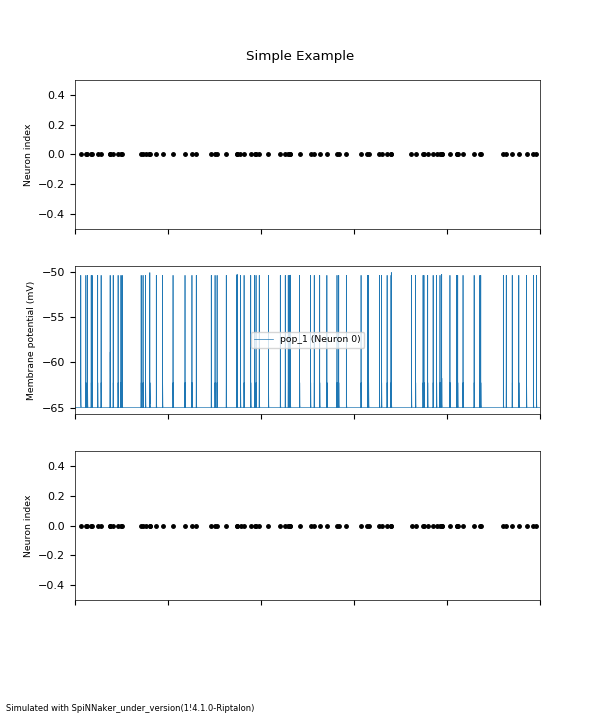

In [8]:
plot.Figure(
    #plot spikes for input population
    plot.Panel(spikes_input, yticks=True, markersize=5, xlim =(0, simtime)),
    
    #plot voltage for first ([0]) neuron
    plot.Panel(v_pop1, ylabel="Membrane potential (mV)", data_labels=[pop_1.label], yticks=True, xlim =(0, simtime)),
    
    #plot spikes for pop1 population
    plot.Panel(spikes_pop1, yticks=True, markersize=5, xlim =(0, simtime)),
    
    title="Simple Example",
    annotations="Simulated with {}".format(sim.name())
)
plt.show()